In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
new_cells = pd.read_csv('/work/users/o/e/oem/PHASER/saved_models/results/inference/unlabeled_inference.csv')
new_cells = new_cells[['id', 'prediction', 'confidence']]
new_cells['id'] = new_cells['id'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
new_cells['id'] = new_cells['id'].str.replace(r"^b'|^b\"|'$|\"$", '', regex=True)
new_cells['id'] = new_cells['id'].str.replace('cell_', '').astype(int)
new_cells.set_index('id', inplace=True)
new_cells.head()

,prediction,confidence
id,,
29,S,0.989387
32,G2,1.000000
36,G2,0.999681
39,S,0.991787
42,G1,0.999892


<Axes: ylabel='confidence'>

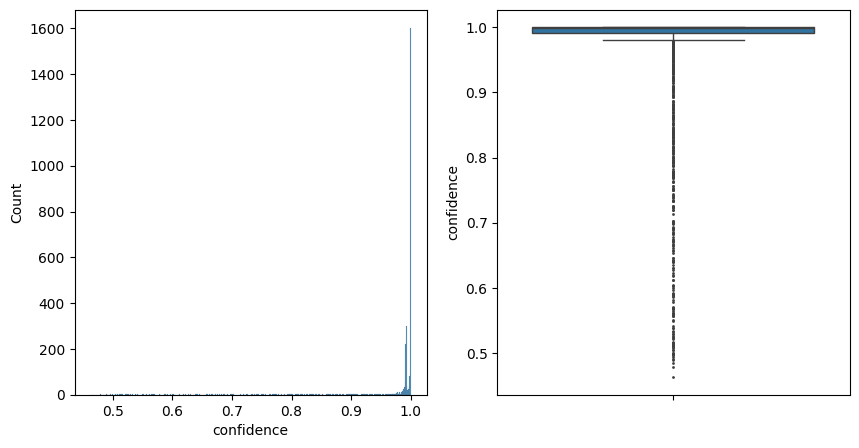

In [55]:
# Check the confidence distribution:

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(new_cells['confidence'], ax=axs[0])
sns.boxplot(new_cells['confidence'], fliersize=1, ax=axs[1])

In [28]:
new_cells['confidence'].describe()

count    2930.000000
mean        0.970323
std         0.087124
min         0.462796
25%         0.991793
50%         0.999497
75%         0.999875
max         1.000000
Name: confidence, dtype: float64

In [29]:
sum(new_cells['confidence'] < 0.99)

550

In [47]:
manifold = pd.read_csv('/work/users/o/e/oem/PHASER/data/wayne_rpe/control_manifold_allfeatures.csv')

manifold = manifold.rename(columns={'Unnamed: 0.1.1': 'id'})

manifold = manifold[['id', 'PHATE_1', 'PHATE_2', 'pred_phase']]
manifold.set_index('id')

/tmp/ipykernel_1087152/1720339182.py:1: DtypeWarning: Columns (299) have mixed types. Specify dtype option on import or set low_memory=False.
  manifold = pd.read_csv('/work/users/o/e/oem/PHASER/data/wayne_rpe/control_manifold_allfeatures.csv')


,PHATE_1,PHATE_2
id,,
0,-0.020654,0.007907
1,0.025945,-0.000735
2,0.002961,-0.004575
3,0.034884,0.002944
5,-0.019039,0.000584
...,...,...
8897,-0.018843,0.000029
8898,0.039467,0.006623
8899,-0.021200,0.000573


In [36]:
# Get the PHATE maps for our predictions only
phate_maps = pd.merge(new_cells, manifold, how='left', on='id').set_index('id')

phate_maps

,prediction,confidence,PHATE_1,PHATE_2
id,,,,
29,S,0.989387,0.007829,-0.004286
32,G2,1.000000,0.043331,0.010682
36,G2,0.999681,0.042867,0.010276
39,S,0.991787,0.028052,-0.001111
42,G1,0.999892,-0.019267,-0.000698
...,...,...,...,...
7101,S,0.991630,0.007692,-0.005600
7111,G1,0.999828,-0.020219,0.000713
7115,G2,0.998628,0.035213,0.003237


In [42]:
# Not predicted
not_predicted = manifold[~manifold.index.isin(phate_maps.index)].set_index('id')

not_predicted

,PHATE_1,PHATE_2
id,,
0,-0.020654,0.007907
1,0.025945,-0.000735
2,0.002961,-0.004575
3,0.034884,0.002944
5,-0.019039,0.000584
...,...,...
8897,-0.018843,0.000029
8898,0.039467,0.006623
8899,-0.021200,0.000573


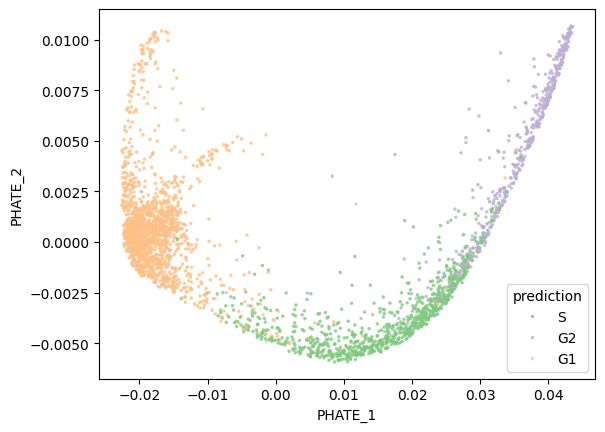

In [49]:

sns.scatterplot(data=phate_maps, x='PHATE_1', y='PHATE_2', hue='prediction', 
                s=5, edgecolor=None, palette='Accent', alpha=0.8)

plt.show()

/tmp/ipykernel_1087152/2413491197.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=low_conf, x='PHATE_1', y='PHATE_2', color='red',


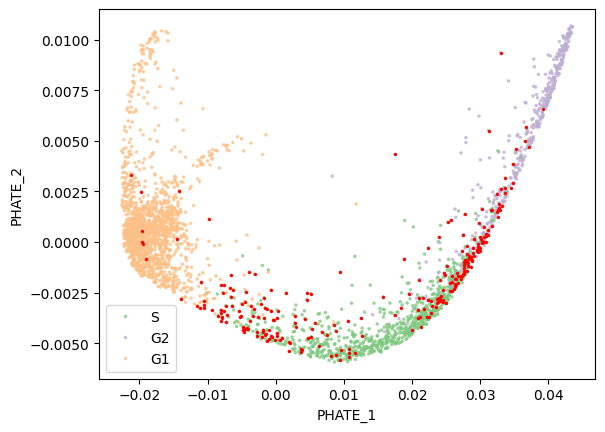

In [56]:
# LEt's see where the low conf is

low_conf = phate_maps[phate_maps['confidence'] < 0.9]

sns.scatterplot(data=phate_maps, x='PHATE_1', y='PHATE_2', hue='prediction', 
                s=5, edgecolor=None, palette='Accent', alpha=0.8)
sns.scatterplot(data=low_conf, x='PHATE_1', y='PHATE_2', color='red', 
                s=5, edgecolor=None, palette='Accent', alpha=1)
plt.show()